## Temperature Trends in Bozeman MT

#### Main question: are temperatures rising over the years?

On Canvas, you should be able to find `Files/Data/USH00241044.tmax.csv` which contains the monthly average of the daily maximum temperature at Bozeman MT.

This data is from the [NOAA US Historical Climatology Network](https://www.ncdc.noaa.gov/ushcn/introduction) through the ftp link.

- It's important to note that "flags" intidcate possible data quality issues. Details are in the readme.txt file through the ftp.
- The units are in hundredths of a degree Celsius, i.e. to get Celsius we need to divide by 100.
- `value0` corresponds to January, ... `value11` corresponds to December.
- Missing values are `-9999`

#### Read in the data and show the first 5 records

In [1]:
df <- read.csv("~/Downloads/USH00241044.tmax.csv")

In [8]:
tail(df)

,X,dmflag0,dmflag1,dmflag10,dmflag11,dmflag2,dmflag3,dmflag4,dmflag5,dmflag6,⋯,value11,value2,value3,value4,value5,value6,value7,value8,value9,year
122,121,,,,,,,,,,⋯,333,572,1276,1780,2016,2901,2612,2249,1900,2014
123,122,a,,,,,,,,a,⋯,52,1267,1394,1604,2655,2671,2778,2328,1713,2015
124,123,,,,,,,,,,⋯,-306,1025,1485,1677,2622,2787,2723,1911,1501,2016
125,124,,,,a,,,,,,⋯,-83,1124,1257,1900,2368,3208,2811,2050,1364,2017
126,125,,,,,,,,,,⋯,74,675,1263,2016,2178,2771,2693,2131,1341,2018
127,126,,,,,,,,,,⋯,-9999,110,1206,1469,2159,-9999,-9999,-9999,-9999,2019


In [3]:
names(df)

[1] "X"        "dmflag0"  "dmflag1"  "dmflag10" "dmflag11" "dmflag2" 
 [7] "dmflag3"  "dmflag4"  "dmflag5"  "dmflag6"  "dmflag7"  "dmflag8" 
[13] "dmflag9"  "dsflag0"  "dsflag1"  "dsflag10" "dsflag11" "dsflag2" 
[19] "dsflag3"  "dsflag4"  "dsflag5"  "dsflag6"  "dsflag7"  "dsflag8" 
[25] "dsflag9"  "id"       "qcflag0"  "qcflag1"  "qcflag10" "qcflag11"
[31] "qcflag2"  "qcflag3"  "qcflag4"  "qcflag5"  "qcflag6"  "qcflag7" 
[37] "qcflag8"  "qcflag9"  "value0"   "value1"   "value10"  "value11" 
[43] "value2"   "value3"   "value4"   "value5"   "value6"   "value7"  
[49] "value8"   "value9"   "year"

In [4]:
months <- paste0("value", 0:11)

In [5]:
months

[1] "value0"  "value1"  "value2"  "value3"  "value4"  "value5"  "value6" 
 [8] "value7"  "value8"  "value9"  "value10" "value11"

In [6]:
vals <- df[, months]

In [9]:
years <- df$year

In [7]:
dim(vals)

[1] 127  12

In [10]:
t_vals <- t(vals)

In [12]:
class(t_vals)

[1] "matrix"

In [13]:
# Depends on R storing data by Columns
vals_vec <- c(t(vals))

In [15]:
vals_vec[vals_vec == -9999] <- NA

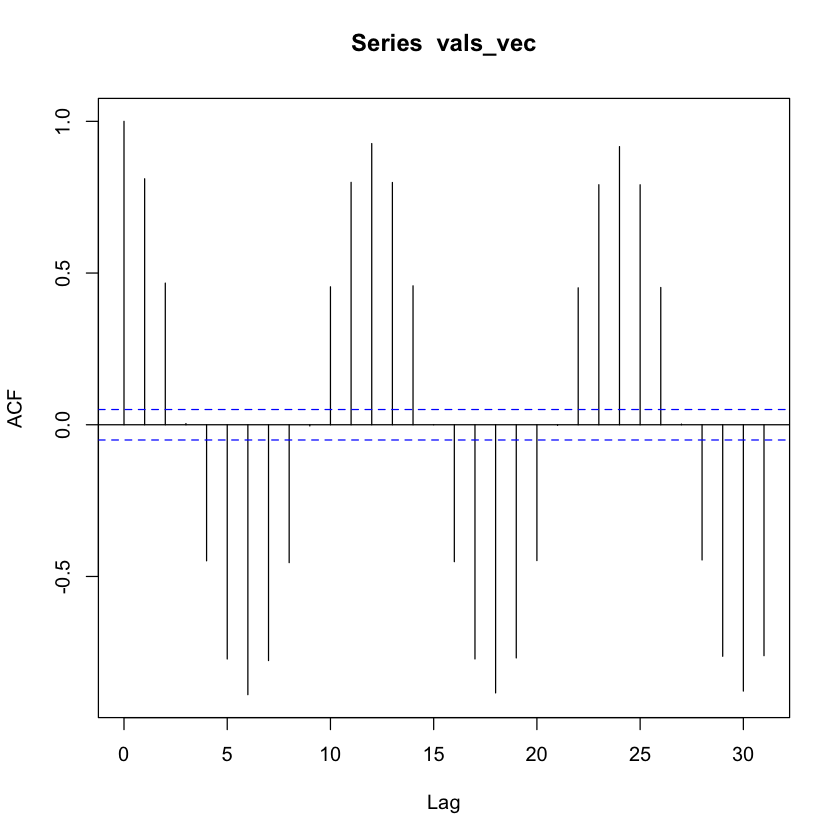

In [19]:
acf(vals_vec, na.action = na.pass)

In [20]:
head(vals_vec)

[1]   NA   NA   NA 1143 1846 2414

In [21]:
celsius <- vals_vec / 100

#### Data wrangling: create a vector where each element is a month's data (in Celsius) in chronological order.

- How should you deal with missing values?

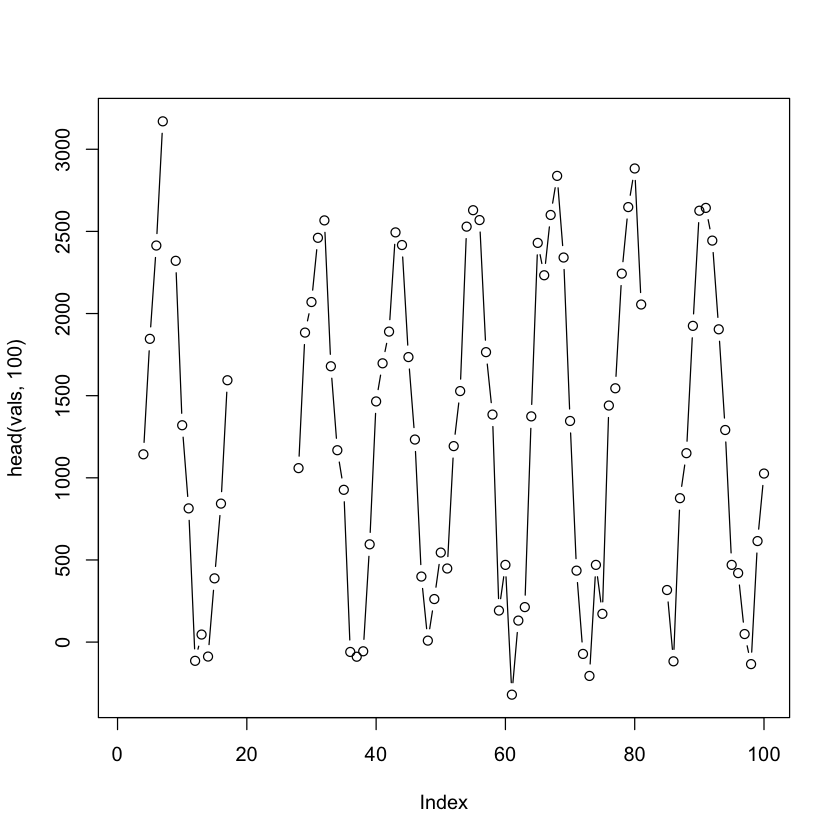

In [29]:
plot(head(vals, 100), type="b")

#### Plot the data and overlay the simple linear regression line aimed at answering the main question

In [22]:
celsius <- vals_vec / 100
time <- 1:length(celsius)

In [33]:
ols <- lm(celsius ~ time)
sintime <- sin(time / 12 * (2 * pi))
costime <- cos(time / 12 * (2 * pi))

ols2 <- lm(celsius ~ time + sintime + costime)

In [37]:
summary(ols2)


Call:
lm(formula = celsius ~ time + sintime + costime)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1115  -1.7934   0.1675   1.8445   7.6442 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.147e+01  1.474e-01   77.79   <2e-16 ***
time         1.961e-03  1.671e-04   11.73   <2e-16 ***
sintime     -7.665e+00  1.025e-01  -74.78   <2e-16 ***
costime     -1.108e+01  1.024e-01 -108.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.802 on 1493 degrees of freedom
  (27 observations deleted due to missingness)
Multiple R-squared:  0.921,	Adjusted R-squared:  0.9209 
F-statistic:  5803 on 3 and 1493 DF,  p-value: < 2.2e-16


In [36]:
sd(ols$residuals)

[1] 9.926825

In [35]:
sd(ols2$residuals)

[1] 2.799468

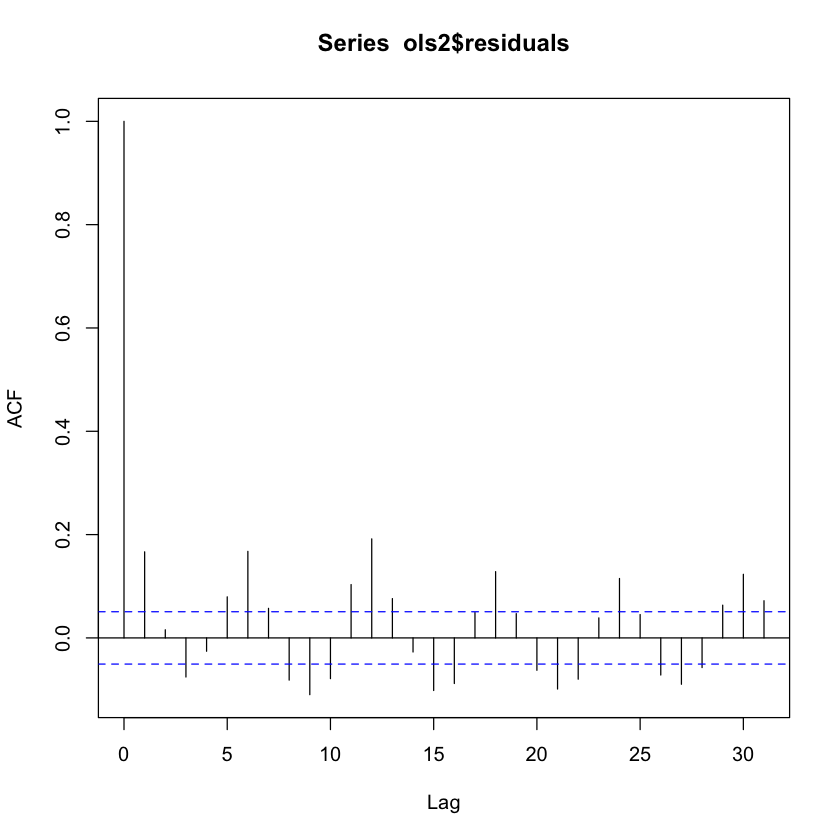

In [34]:
acf(ols2$residuals)

#### Look at the coefficients from the regression and answer which value is related to our main question? 

#### Please validate the assumptions for the OLS and explain its implications on our main question

- Make sure your validation includes a residual plot that only uses the last 100 records.

#### Try adding a cyclical feature in your OLS!
- Hint: what function(s) do you know have a cyclical behavior?

#### How would you demonstrate that there is improvement in the new model?